In [1]:
import numpy as np
import scipy
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

from graph_embedding_continuity import *

### Draw graph and its 2-step Markov chain

/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


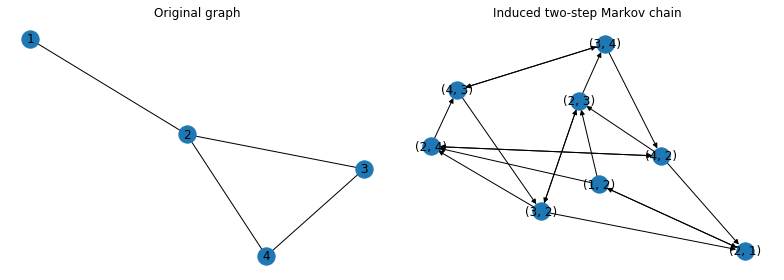

In [2]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4])

G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(3,4)

G_ = rw_2step_graph(G)

fig, axes = plt.subplots(figsize=(11,4), nrows=1, ncols=2)

ax = axes[0]
nx.draw_networkx(G, ax=ax)
ax.axis('off')
ax.set_title('Original graph')

ax = axes[1]
nx.draw_networkx(G_, ax=ax)
ax.axis('off')
ax.set_title('Induced two-step Markov chain')

plt.tight_layout()
plt.show()

### Two-step Markov transition matrix

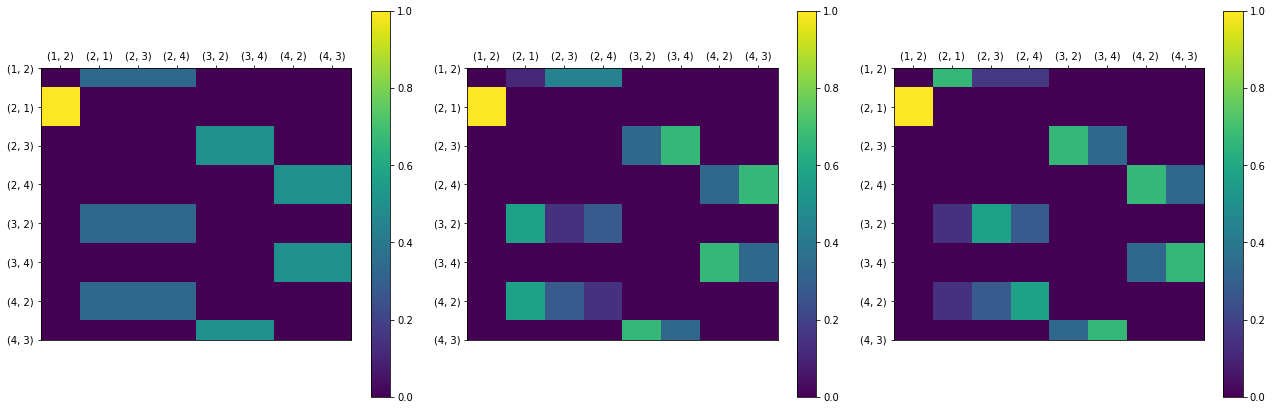

In [3]:
fig, axes = plt.subplots(figsize=(18,7), nrows=1, ncols=3)

nodes_ = G_.nodes
P_standard = rw_2step_transition_matrix(G=G, p=1.0, q=1.0)
P_dfs = rw_2step_transition_matrix(G=G, p=2.0, q=0.5)
P_bfs = rw_2step_transition_matrix(G=G, p=0.5, q=2.0)

ax = axes[0]
im = ax.imshow(P_standard.A, interpolation='none')
ax.set_xticks(range(len(nodes_)))
ax.set_yticks(range(len(nodes_)))
ax.set_xticklabels(nodes_)
ax.set_yticklabels(nodes_)
ax.xaxis.set_ticks_position('top')
fig.colorbar(im, ax=ax, shrink=0.8)

ax = axes[1]
im = ax.imshow(P_dfs.A, interpolation='none')
ax.set_xticks(range(len(nodes_)))
ax.set_yticks(range(len(nodes_)))
ax.set_xticklabels(nodes_)
ax.set_yticklabels(nodes_)
ax.xaxis.set_ticks_position('top')
fig.colorbar(im, ax=ax, shrink=0.8)

ax = axes[2]
im = ax.imshow(P_bfs.A, interpolation='none')
ax.set_xticks(range(len(nodes_)))
ax.set_yticks(range(len(nodes_)))
ax.set_xticklabels(nodes_)
ax.set_yticklabels(nodes_)
ax.xaxis.set_ticks_position('top')

fig.colorbar(im, ax=ax, shrink=0.8)

plt.tight_layout()
plt.show()

### Standard and node2vec eigenmap embeddings

In [4]:
emb, _ = eigenmap_embedding(G, k=2)
emb_pq_standard = rw_factorization_embedding(G, k=2, p=1.0, q=1.0)
emb_pq_dfs = rw_factorization_embedding(G, k=2, p=2.0, q=0.5)
emb_pq_bfs = rw_factorization_embedding(G, k=2, p=0.5, q=2.0)

/home/sauxpa/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:296: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


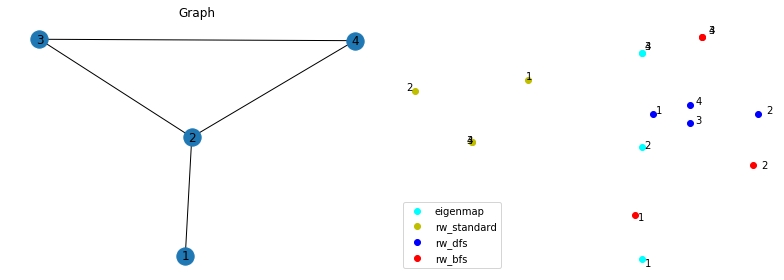

In [22]:
fig, axes = plt.subplots(figsize=(11, 4), nrows=1, ncols=2)

ax = axes[0]
nx.draw_networkx(G, ax=ax)
ax.set_title('Graph')
ax.axis('off')

ax = axes[1]
ax.scatter(emb[:, 0], emb[:, 1], label='eigenmap', color='cyan')
ax.scatter(emb_pq_standard[:, 0], emb_pq_standard[:, 1], label='rw_standard', color='y')
ax.scatter(emb_pq_dfs[:, 0], emb_pq_dfs[:, 1], label='rw_dfs', color='b')
ax.scatter(emb_pq_bfs[:, 0], emb_pq_bfs[:, 1], label='rw_bfs', color='r')
for i, node in enumerate(G.nodes):
    ax.annotate(node, xy=emb[i]*1.05)
    ax.annotate(node, xy=emb_pq_standard[i]*1.05)
    ax.annotate(node, xy=emb_pq_dfs[i]*1.05)
    ax.annotate(node, xy=emb_pq_bfs[i]*1.05)

ax.legend()
ax.axis('off')

plt.tight_layout()
plt.show()